# Create the Clifford(1) group dictionnary 

In [95]:
import numpy as np
import qutip
from qutip import basis
from numpy.random import randint,choice
import math
import copy
import matplotlib.pyplot as plt
from scipy import optimize

In [96]:
I = np.asarray([[1,0],[0,1]],dtype=np.complex_)
X = np.asarray([[0,1],[1,0]],dtype=np.complex_)
Y = np.asarray([[0,-1j],[1j,0]],dtype=np.complex_)
Z = np.asarray([[1,0],[0,-1]],dtype=np.complex_)
H = np.asarray([[1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),-1/np.sqrt(2)]],dtype=np.complex_)
S = np.asarray([[1,0],[0,1j]],dtype=np.complex_)
Sdg = np.asarray([[1,0],[0,-1j]],dtype=np.complex_)


#build a dictionnary for the clifford group where 
Clifford1 = {0:{'label':'Id','matrix':np.asarray([[1,0],[0,1]],dtype=np.complex_), 'noise':'DE'},
            1:{'label':'X','matrix':np.asarray([[0,1],[1,0]],dtype=np.complex_), 'noise':'BF'},
            2:{'label':'Y','matrix':np.asarray([[0,-1j],[1j,0]],dtype=np.complex_), 'noise':0},
            3:{'label':'Z','matrix':np.asarray([[1,0],[0,-1]],dtype=np.complex_), 'noise':0},
            4:{'label':'H','matrix':np.asarray([[1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),-1/np.sqrt(2)]],dtype=np.complex_),'noise':0},
            }

# set noise to 0 initially
for i in range(5,24):
    Clifford1[i]={}
    Clifford1[i]['noise']=0

Clifford1[5]['label'] = 'HSdg'
Clifford1[5]['matrix'] = np.matmul(H,Sdg)

Clifford1[6]['label'] = 'ZHSdg'
Clifford1[6]['matrix'] = np.matmul(Z,np.matmul(H,Sdg))

Clifford1[7]['label'] = 'XHSdg'
Clifford1[7]['matrix'] = np.matmul(X,np.matmul(H,Sdg))

Clifford1[8]['label'] = 'YHSdg'
Clifford1[8]['matrix'] = np.matmul(Y,np.matmul(H,Sdg))

Clifford1[9]['label'] = 'SH'
Clifford1[9]['matrix'] = np.matmul(S,H)

Clifford1[10]['label'] = 'ZSH'
Clifford1[10]['matrix'] = np.matmul(Z,np.matmul(S,H))

Clifford1[11]['label'] = 'YSH'
Clifford1[11]['matrix'] = np.matmul(Y,np.matmul(S,H))

Clifford1[12]['label'] = 'XSH'
Clifford1[12]['matrix'] = np.matmul(X,np.matmul(S,H))

Clifford1[13]['label'] = 'ZH'
Clifford1[13]['matrix'] = np.matmul(Z,H)

Clifford1[14]['label'] = 'YH'
Clifford1[14]['matrix'] = np.matmul(Y,H)

Clifford1[15]['label'] = 'XH'
Clifford1[15]['matrix'] = np.matmul(X,H)

Clifford1[16]['label'] = 'HSdgH'
Clifford1[16]['matrix'] = np.matmul(Clifford1[5]['matrix'],H)

Clifford1[17]['label'] = 'ZHSdgH'
Clifford1[17]['matrix'] = np.matmul(Z,Clifford1[16]['matrix'])

Clifford1[18]['label'] = 'YHSdgH'
Clifford1[18]['matrix'] = np.matmul(Y,Clifford1[16]['matrix'])

Clifford1[19]['label'] = 'XHSdgH'
Clifford1[19]['matrix'] = np.matmul(X,Clifford1[16]['matrix'])

Clifford1[20]['label'] = 'SHH'
Clifford1[20]['matrix'] = np.matmul(Clifford1[9]['matrix'],Clifford1[4]['matrix'])

Clifford1[21]['label'] = 'ZSHH'
Clifford1[21]['matrix'] = np.matmul(Z,Clifford1[20]['matrix'])

Clifford1[22]['label'] = 'YSHH'
Clifford1[22]['matrix'] = np.matmul(Y,Clifford1[20]['matrix'])

Clifford1[23]['label'] = 'XSHH'
Clifford1[23]['matrix'] = np.matmul(X,Clifford1[20]['matrix'])

### How do these gates act on the Bloch sphere? 

In [97]:
def cart_to_polar(a, dtype=np.complex):
    if a == 0:
        r,theta = (0,0)
    else:
        x,y = a.real, a.imag
        r = np.sqrt(x**2+y**2)
        if x == 0:
            theta = np.sign(y) * math.pi/2
        elif y==0 and x > 0 : 
            theta = 0
        elif y==0 and x < 0 : 
            theta = math.pi
        else: 
            theta = math.atan(y/x)

    return r,theta

def hilb_to_bloch_coordinates(psi):
    a = psi[0]
    b = psi[1]
    r_a, theta_a = cart_to_polar(a)
    r_b, theta_b = cart_to_polar(b)
    phi = theta_b - theta_a
    theta = 2*math.acos(r_a)
    v = [math.sin(theta)*math.cos(phi),math.sin(theta)*math.sin(phi),math.cos(theta)]
    for i in range(3):
        if abs(v[i])< 1.e-2:
            v[i] = 0
    return v

def Clifford_effect_on_basis(Cliff):
    Q_basis_after = []
    basis_after = []
    b = qutip.Bloch()
    c = qutip.Bloch()
    basis = [[1,0,0],[0,1,0],[0,0,1]]
    Q_basis = [[1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),1j/np.sqrt(2)],[1,0]]
    b.add_vectors(basis)
    for elem in Q_basis: #do the Cliff operations 
        Q_basis_after.append(Cliff.dot(elem))
    for el in Q_basis_after: #convert them to Bloch representation 
        basis_after.append(hilb_to_bloch_coordinates(el))
    c.add_vectors(basis_after)
    b.show()
    c.show()
    

/Applications/anaconda3/lib/python3.7/site-packages/qutip/bloch.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig = plt.figure(figsize=self.figsize)


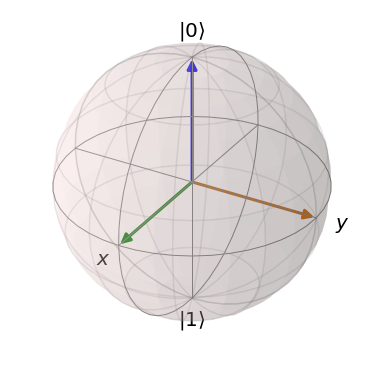

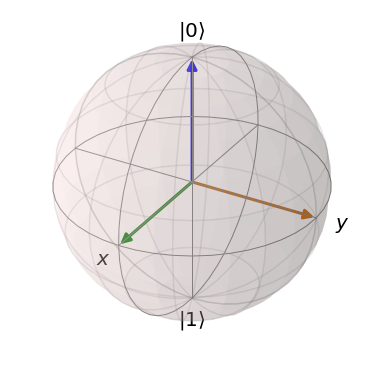

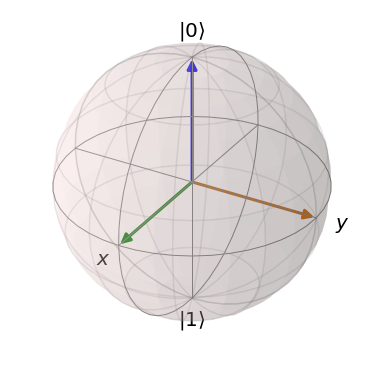

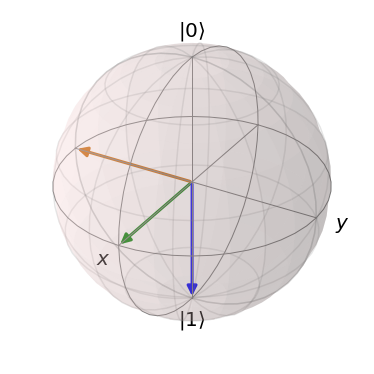

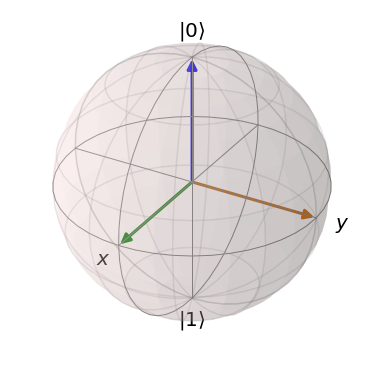

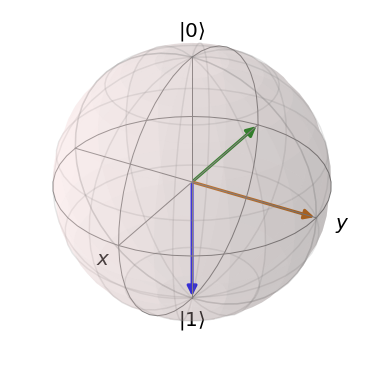

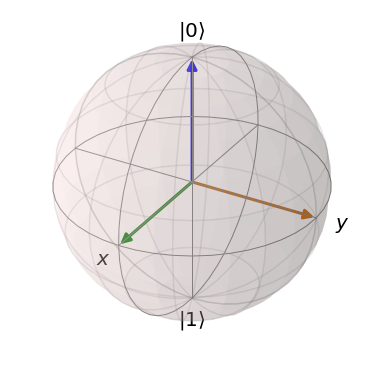

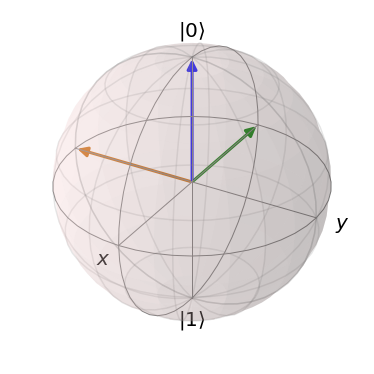

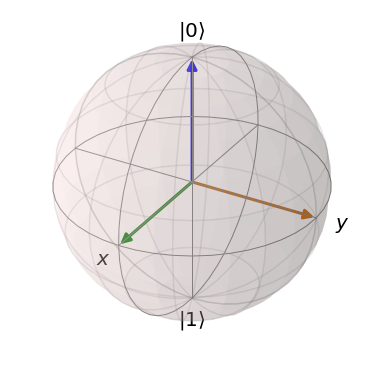

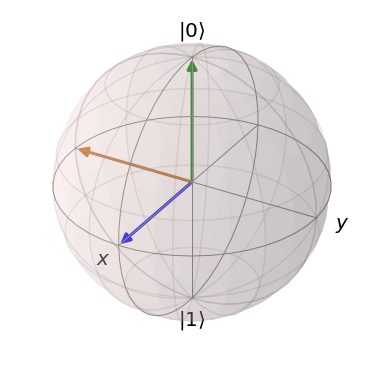

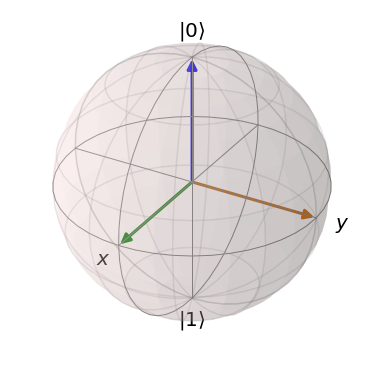

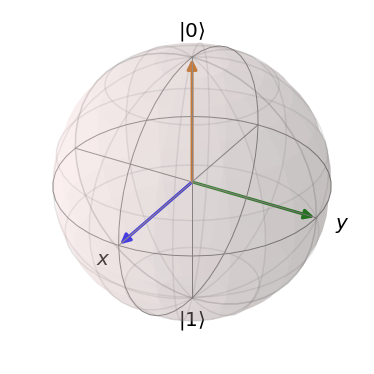

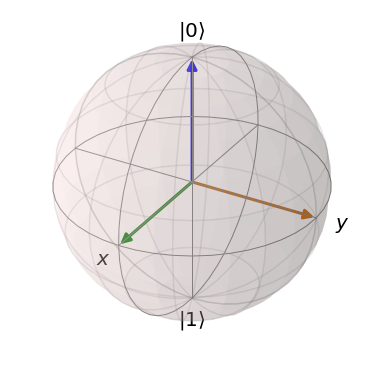

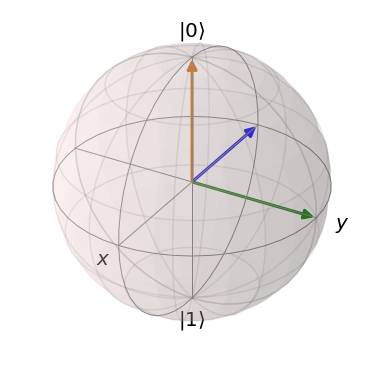

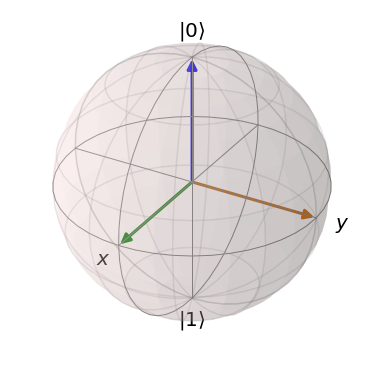

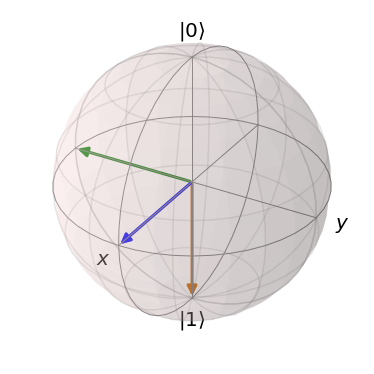

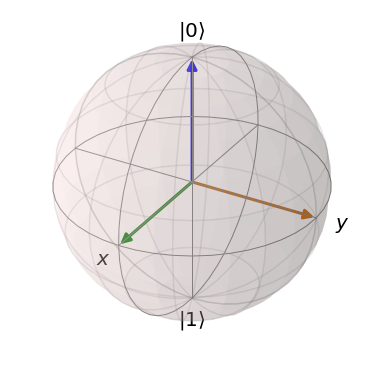

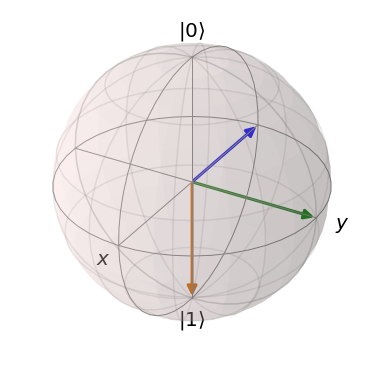

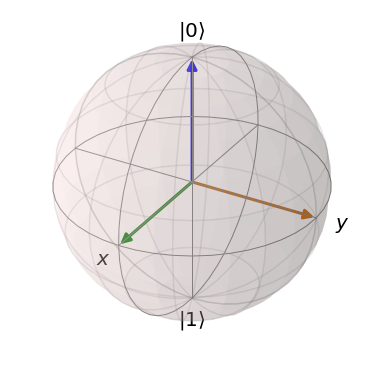

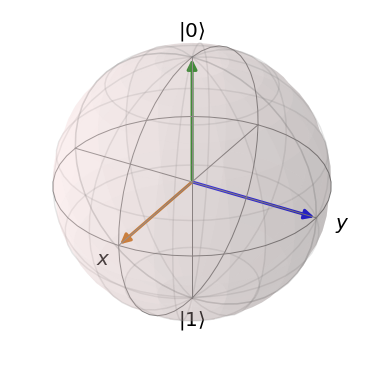

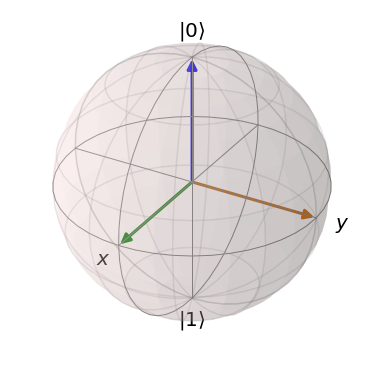

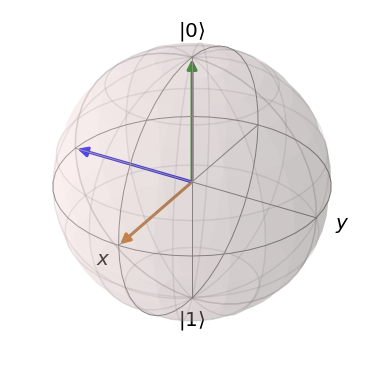

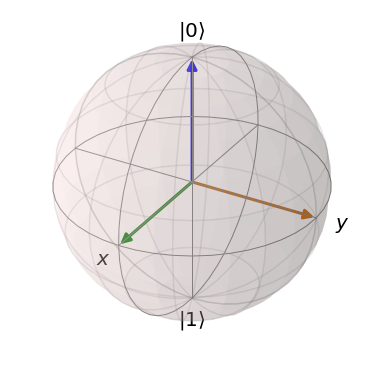

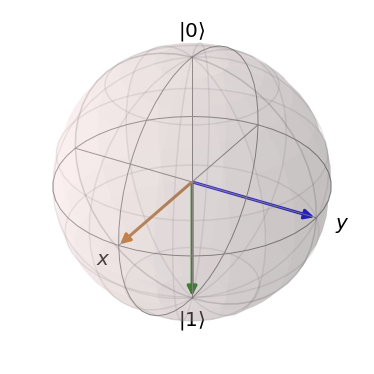

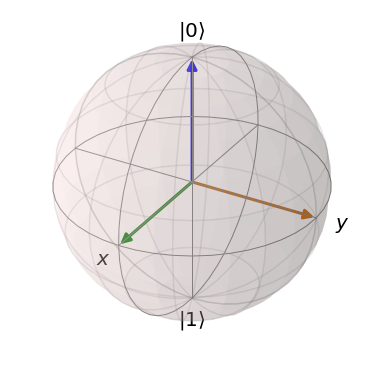

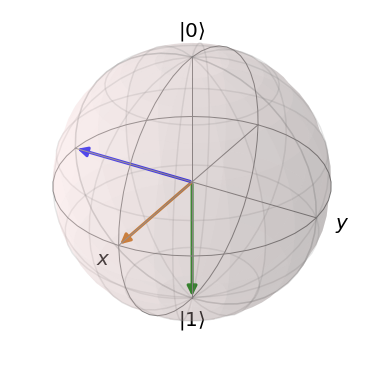

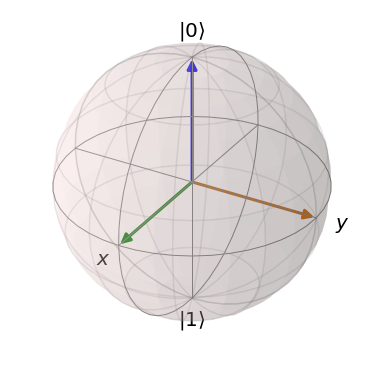

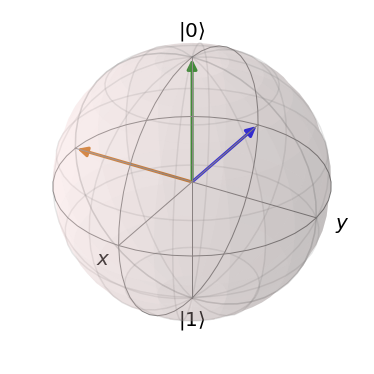

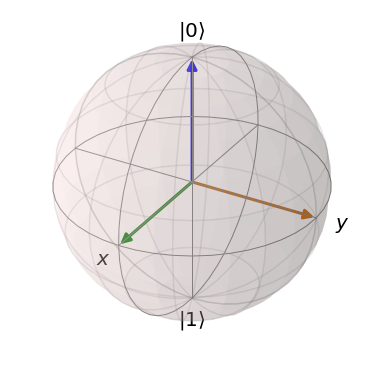

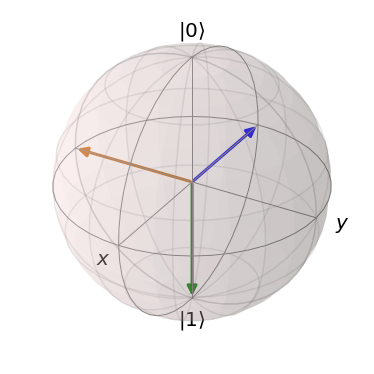

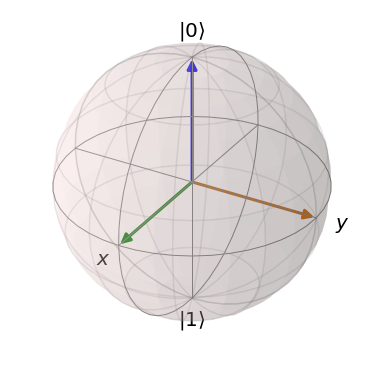

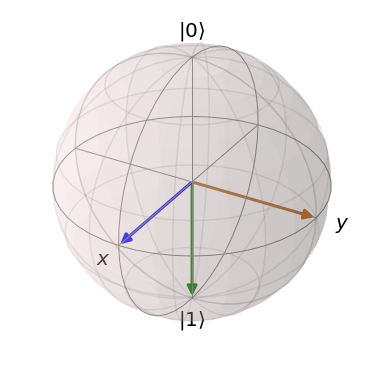

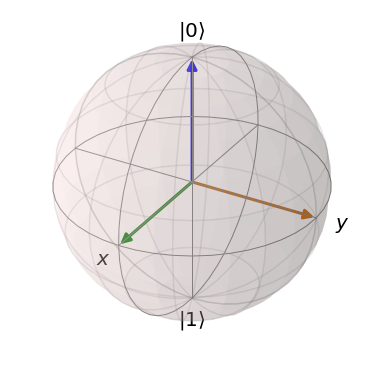

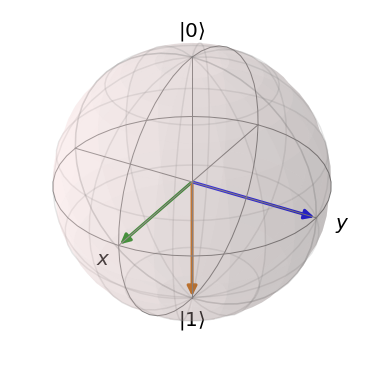

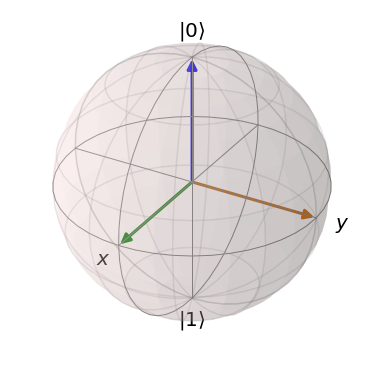

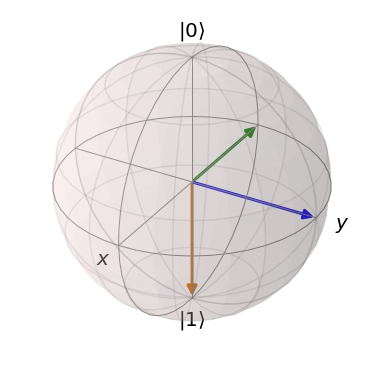

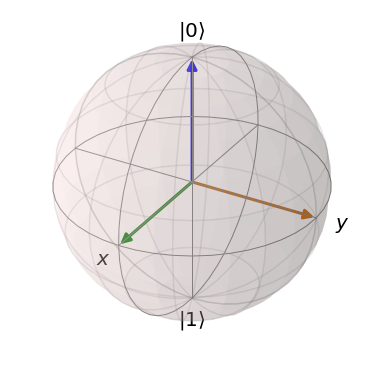

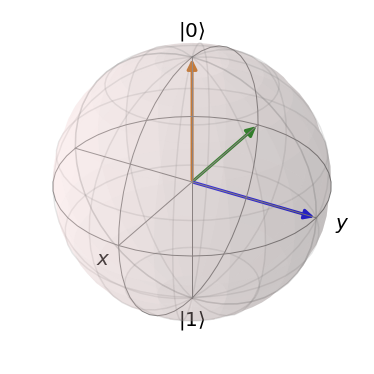

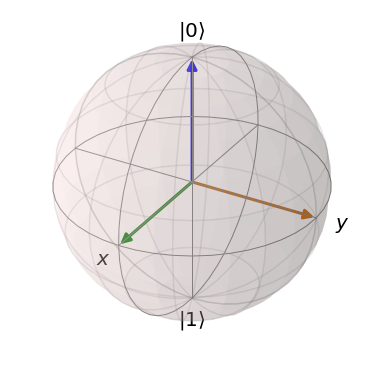

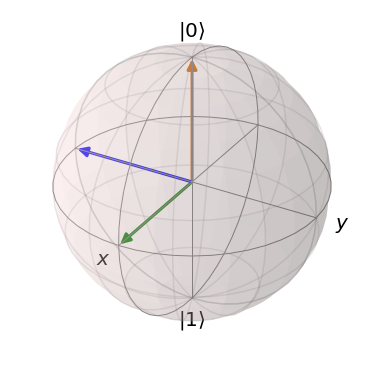

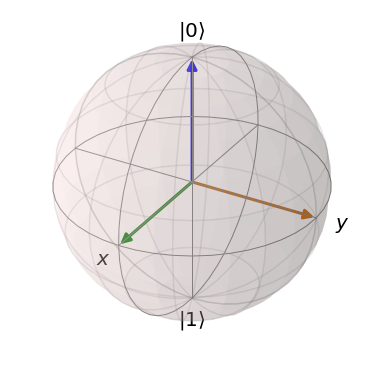

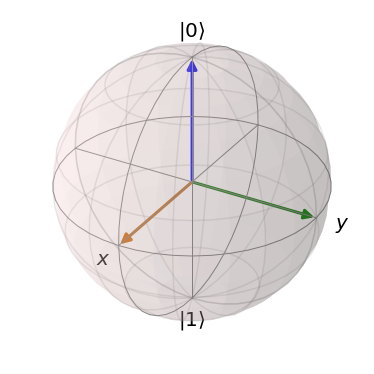

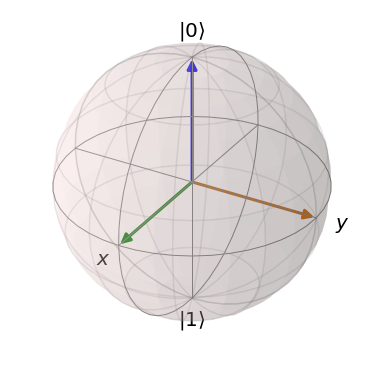

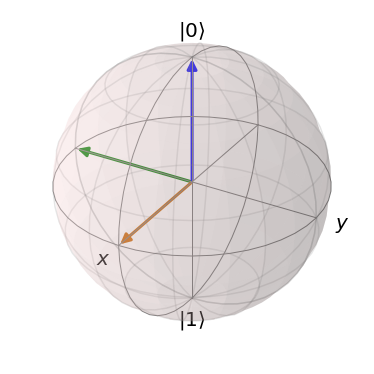

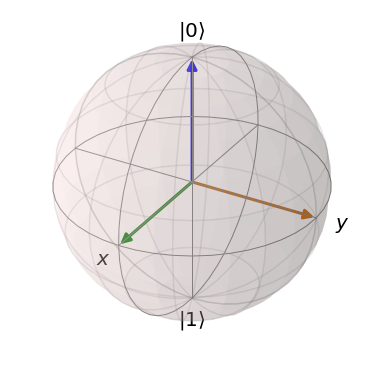

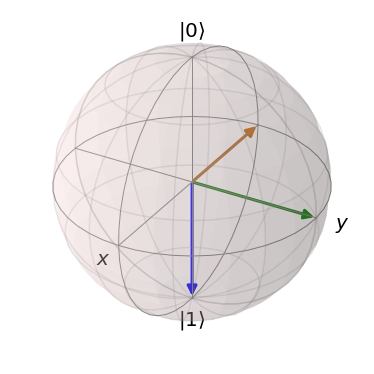

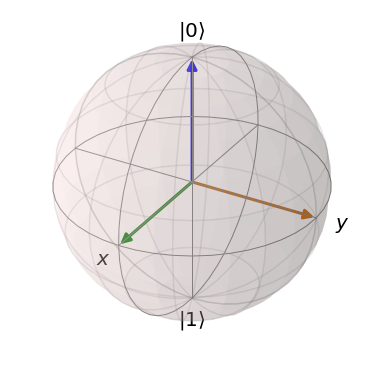

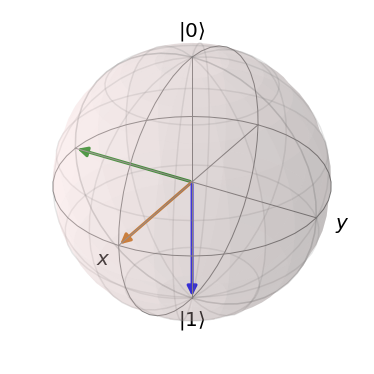

In [98]:
for key in Clifford1.keys():
    Clifford_effect_on_basis(Clifford1[key]['matrix'])

# Randomized benchmarking (using density matrices)

In [99]:
def multiplyMatrixList(mylist,n) : #n is the dimension of the matrices
    # Multiply elements one by one 
    result = np.identity(n)
    for x in mylist: 
         result = np.matmul(result,x)  
    return result

In [100]:
multiplyMatrixList(Clifford_inv_sequence[4],2)

array([[-0.5-0.5j, -0.5-0.5j],
       [-0.5+0.5j,  0.5-0.5j]])

In [101]:
rho = np.array([[1,0],[0,0]])


# convert vector to density matrix
def vector_to_density_matrix(k):
    bra = np.conjugate(k)
    return np.outer(k,bra)

def dagger(U):
    return np.conjugate(U.T)


def quantum_channel(U,rho):   #returns the density matrix
    return np.matmul(U,np.matmul(rho,dagger(U)))

In [115]:
# Prepare initial density matrix 
q_0 = np.asarray([1,0])

# Prepare the Clifford sequence for nseed = 1 
vector_length = [i for i in range(1,101)]
Clifford_sequence = [[] for el in vector_length] # list of sublist where sublist[k] has k gates
Clifford_inv_sequence = [[] for el in vector_length]
Clifford_inv_sequence_test = []
for l in vector_length:
    rand_seq = randint(0, 23, l)
    for i in rand_seq:
        Clifford_sequence[l-1].append(Clifford1[i]['matrix'])
        Clifford_inv_sequence[l-1].append(np.linalg.inv((Clifford1[i]['matrix'])))
        
#inverse the Cliff_inv sequence to apply it "normally"
for i in range(len(Clifford_inv_sequence)):
    Clifford_inv_sequence_test.append(multiplyMatrixList(Clifford_inv_sequence[i],2))



### We can verify that applying the sequence then its inverse yields $\rho_{0}$ again

In [122]:

#Apply the gates, apply the inverses
for l in vector_length:
    rho_0 = vector_to_density_matrix(q_0)         #initial state
    for Clifford in Clifford_sequence[l-1]:
        rho_0 = quantum_channel(Clifford,rho_0)
    rho_0 = quantum_channel(Clifford_inv_sequence_test[l-1],rho_0)
    #check that trace is conserved 
print(rho_0) 

[[1.00000000e+00+0.00000000e+00j 1.24491566e-16+3.33066907e-16j]
 [1.24491566e-16-3.33066907e-16j 1.26431715e-31-8.04651853e-46j]]


# Adding Noise

By assumption each operation $C_{i_j}$ is allowed to have some error, represented by $\Lambda_{i_j,j}$, and each sequence can be modeled by the operation:
$$\textit{S}_{\textbf{i}_\textbf{m}} = \bigcirc_{j=1}^{m+1} (\Lambda_{i_j,j} \circ C_{i_j})$$
where ${\textbf{i}_\textbf{m}} = (i_1,...,i_m)$ and $i_{m+1}$ is uniquely determined by ${\textbf{i}_\textbf{m}}$.

### Different types of noise errors

In [104]:
#add a depolarizing error to a gate (find the equation in 8.102 of Nielse-Chuang)

def depolarizing_error(rho,dp): #dp is the probability of depolarizing
    E_1 = np.identity(2)*np.sqrt(1-3*dp/4)
    E_2 = np.array([[0,1*np.sqrt(dp/4)],[1*np.sqrt(dp/4),0]])  #Kraus operators
    E_3 = np.array([[0,-1j*np.sqrt(dp/4)],[1j*np.sqrt(dp/4),0]])
    E_4 = np.array([[1*np.sqrt(dp/4),0],[0,-1*np.sqrt(dp/4)]])
    A = np.matmul(E_1,np.matmul(rho,dagger(E_1)))+np.matmul(E_2,np.matmul(rho,dagger(E_2)))+np.matmul(E_3,np.matmul(rho,dagger(E_3)))+np.matmul(E_4,np.matmul(rho,dagger(E_4)))
    return A

    #I checked if np.trace(A) == 1, all good.

def amplitude_dampling(rho,gamma):
    E_1 = np.array([[1,0],[0,np.sqrt(1-gamma)]])
    E_2 = np.array([[0,np.sqrt(gamma)],[0,0]])
    return np.matmul(E_1,np.matmul(rho,dagger(E_1)))+np.matmul(E_2,np.matmul(rho,dagger(E_2)))

def phase_dampling(rho,gamma):
    E_1 = np.array([[1,0],[0,np.sqrt(1-gamma)]])
    E_2 = np.array([[0,0],[0,np.sqrt(gamma)]])
    return np.matmul(E_1,np.matmul(rho,dagger(E_1)))+np.matmul(E_2,np.matmul(rho,dagger(E_2)))

def phase_flip(rho,dp):
    E_1 = np.identity(2)*np.sqrt(dp)
    E_2 = np.array([[1,0],[0,-1]])*np.sqrt(1-dp)
    return np.matmul(E_1,np.matmul(rho,dagger(E_1)))+np.matmul(E_2,np.matmul(rho,dagger(E_2)))

def bit_flip(rho,dp):
    E_1 = np.identity(2)*np.sqrt(1-dp)
    E_2 = np.array([[0,1],[1,0]])*np.sqrt(dp)
    return np.matmul(E_1,np.matmul(rho,dagger(E_1)))+np.matmul(E_2,np.matmul(rho,dagger(E_2)))

def bit_phase_flip(rho,dp):
    E_1 = np.identity(2)*np.sqrt(dp)
    E_2 = np.array([[0,-1j],[1j,0]])*np.sqrt(1-dp)
    return np.matmul(E_1,np.matmul(rho,dagger(E_1)))+np.matmul(E_2,np.matmul(rho,dagger(E_2)))

What's the impact of error on the clifford gates?

In [105]:
q_1 = np.asarray([1,0])
rho_1 = vector_to_density_matrix(q_0) 
rho_1
print(Clifford1[0]['matrix'])
quantum_channel(Clifford1[0]['matrix'],rho_1)

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [106]:
def impact_on_cliff(U,dp):  
    E_1 = np.identity(2)*np.sqrt(1-3*dp/4)
    E_2 = np.array([[0,1*np.sqrt(dp/4)],[1*np.sqrt(dp/4),0]])  #Kraus operators
    E_3 = np.array([[0,-1j*np.sqrt(dp/4)],[1j*np.sqrt(dp/4),0]])
    E_4 = np.array([[1*np.sqrt(dp/4),0],[0,-1*np.sqrt(dp/4)]])
    A = np.matmul(E_1,U)
    B = np.matmul(E_2,U)
    C = np.matmul(E_3,U)
    D = np.matmul(E_4,U)
    
    return A,B,C,D

In [107]:
x = impact_on_cliff(Clifford1[1]['matrix'],0)
x

(array([[0.+0.j, 1.+0.j],
        [1.+0.j, 0.+0.j]]), array([[0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j]]), array([[0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j]]), array([[0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j]]))

In [108]:
Tot = quantum_channel(x[0],rho_1) + quantum_channel(x[1],rho_1) + quantum_channel(x[2],rho_1) + quantum_channel(x[3],rho_1)

Tot

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [109]:
for i in range(24):
    U = Clifford1[i]['matrix']
    x = impact_on_cliff(U,0.1)
    Total = quantum_channel(x[0],rho_1)+quantum_channel(x[1],rho_1)+quantum_channel(x[2],rho_1)+quantum_channel(x[3],rho_1)
    print(Total)
    

[[0.95+0.j 0.  +0.j]
 [0.  +0.j 0.05+0.j]]
[[0.05+0.j 0.  +0.j]
 [0.  +0.j 0.95+0.j]]
[[0.05+0.j 0.  +0.j]
 [0.  +0.j 0.95+0.j]]
[[0.95+0.j 0.  +0.j]
 [0.  +0.j 0.05+0.j]]
[[0.5 +0.j 0.45+0.j]
 [0.45+0.j 0.5 +0.j]]
[[0.5 +0.j 0.45+0.j]
 [0.45+0.j 0.5 +0.j]]
[[ 0.5 +0.j -0.45+0.j]
 [-0.45+0.j  0.5 +0.j]]
[[0.5 +0.j 0.45+0.j]
 [0.45+0.j 0.5 +0.j]]
[[ 0.5 +0.j -0.45+0.j]
 [-0.45+0.j  0.5 +0.j]]
[[0.5+0.j   0. -0.45j]
 [0. +0.45j 0.5+0.j  ]]
[[0.5+0.j   0. +0.45j]
 [0. -0.45j 0.5+0.j  ]]
[[0.5+0.j   0. -0.45j]
 [0. +0.45j 0.5+0.j  ]]
[[0.5+0.j   0. +0.45j]
 [0. -0.45j 0.5+0.j  ]]
[[ 0.5 +0.j -0.45+0.j]
 [-0.45+0.j  0.5 +0.j]]
[[ 0.5 +0.j -0.45+0.j]
 [-0.45+0.j  0.5 +0.j]]
[[0.5 +0.j 0.45+0.j]
 [0.45+0.j 0.5 +0.j]]
[[0.5+0.j   0. -0.45j]
 [0. +0.45j 0.5+0.j  ]]
[[0.5+0.j   0. +0.45j]
 [0. -0.45j 0.5+0.j  ]]
[[0.5+0.j   0. -0.45j]
 [0. +0.45j 0.5+0.j  ]]
[[0.5+0.j   0. +0.45j]
 [0. -0.45j 0.5+0.j  ]]
[[0.95+0.00000000e+00j 0.  +2.01340289e-17j]
 [0.  -2.01340289e-17j 0.05+0.00000000e+00j]]
[

### Depolarizing error for every gate

In [110]:
# Prepare initial density matrix and depolarizing probability
q_0 = np.asarray([1,0])
dp = 0.1

In [126]:
# Prepare the Clifford sequence 
vector_length = [i for i in range(1,101)]
Clifford_sequence = [[] for el in vector_length] # list of sublist where sublist[k] has k gates
Clifford_inv_sequence = [[] for el in vector_length]
Clifford_inv_sequence_test = []
survival = []
rand = [] #keep track of the clifford gates id's

for l in vector_length:
    rand_seq = randint(0, 23, l)
    rand.append(rand_seq)
    for i in rand_seq:
        Clifford_sequence[l-1].append(Clifford1[i]['matrix'])
        Clifford_inv_sequence[l-1].append(np.linalg.inv((Clifford1[i]['matrix'])))
        

#inverse the Cliff_inv sequence to apply it properly
for i in range(len(Clifford_inv_sequence)):
    Clifford_inv_sequence_test.append(multiplyMatrixList(Clifford_inv_sequence[i],2))




#Apply the gates, apply the inverses, and append survival probability
for l in vector_length:
    rho_0 = vector_to_density_matrix(q_0)         #initial state
    for Clifford in Clifford_sequence[l-1]:
        rho_0 = depolarizing_error(quantum_channel(Clifford,rho_0),dp)
    rho_0 = depolarizing_error(quantum_channel(Clifford_inv_sequence_test[l-1],rho_0),dp) #One noise for all the inverse
    # check that the channel conserves the trace 
    #print(np.trace(rho_0).real)
    survival.append(np.trace(np.matmul(vector_to_density_matrix(q_0),rho_0)).real)  #POVM


#### Plot, fit the results and get an estimation of depolarization parameter

In [127]:
 def fit(l,alpha,a,b):
    return a * alpha ** l + b

params, params_covariance = optimize.curve_fit(fit,vector_length, survival, p0=[1-dp,0.4,0.5])
params

array([0.9 , 0.45, 0.5 ])

0.449999999999999 *( 0.8999999999999987 )**length +  0.5000000000000026


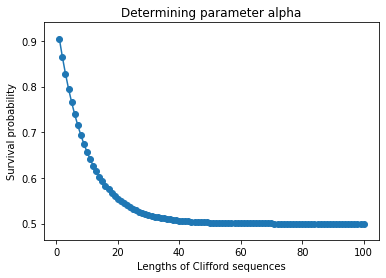

In [128]:
plt.figure(figsize=(6, 4))
plt.scatter(vector_length, survival, label='Data')
plt.plot(vector_length, fit(vector_length, params[0],params[1],params[2]),
         label='Fitted function')
plt.title("Determining parameter alpha")
plt.xlabel("Lengths of Clifford sequences")
plt.ylabel("Survival probability")
print(params[1],"*(",params[0],")**length + ",params[2])
plt.show()


### Specifying the noise associated to each gate 

Careful: RB works on the idea that noise is gate independent, i.e. same noise for every gate

In [129]:
# Ask the user for the noise he wants to associate with each gate 
for i in Clifford1.keys():
    print('Noise of gate:', Clifford1[i]['label'])
    Clifford1[i]['noise']= input('noise')

Noise of gate: Id
noisea
Noise of gate: X
noisea
Noise of gate: Y
noisea
Noise of gate: Z
noisea
Noise of gate: H
noisea
Noise of gate: HSdg
noisea
Noise of gate: ZHSdg
noisea
Noise of gate: XHSdg
noisea
Noise of gate: YHSdg
noisea
Noise of gate: SH
noisea
Noise of gate: ZSH
noisea
Noise of gate: YSH
noisea
Noise of gate: XSH
noisea
Noise of gate: ZH
noisea
Noise of gate: YH
noisea
Noise of gate: XH
noisea
Noise of gate: HSdgH
noisea
Noise of gate: ZHSdgH
noisea
Noise of gate: YHSdgH
noiseaa
Noise of gate: XHSdgH
noisea
Noise of gate: SHH
noisea
Noise of gate: ZSHH
noise
Noise of gate: YSHH
noisea
Noise of gate: XSHH
noise


In [217]:
# Prepare the Clifford sequence 
vector_length = [i for i in range(1,101)]
Clifford_sequence = [[] for el in vector_length] # list of sublist where sublist[k] has k gates
Clifford_inv_sequence = [[] for el in vector_length]
survival = []
rand = [] #keep track of the clifford gates id's

for l in vector_length:
    rand_seq = randint(0, 23, l)
    rand.append(rand_seq)
    for i in rand_seq:
        Clifford_sequence[l-1].append(Clifford1[i]['matrix'])
        Clifford_inv_sequence[l-1].append(np.linalg.inv((Clifford1[i]['matrix'])))
        

#inverse the Cliff_inv sequence to apply it properly
for li_st in Clifford_inv_sequence:
    li_st.reverse()
    


#Apply the gates, apply the inverses, and append survival probability
for l in vector_length:
    rho_0 = vector_to_density_matrix(q_0)         #initial state
    for Clifford in Clifford_sequence[l-1]:
        rho_0 = depolarizing_error(quantum_channel(Clifford,rho_0),dp)
    for Cliff in Clifford_inv_sequence[l-1]:
        rho_0 = depolarizing_error(quantum_channel(Cliff,rho_0),dp)
    # check that the channel conserves the trace 
    # print(np.trace(rho_0).real)
    survival.append(np.trace(np.matmul(vector_to_density_matrix(q_0),rho_0)).real)  #POVM

# Nseeds > 1 

In [132]:
nseeds = 30
dp

0.1

In [133]:
# Prepare the Clifford sequence 
vector_length = [i for i in range(1,50)]
Clifford_sequence = [[] for el in vector_length] # list of sublist where sublist[k] has k gates
Clifford_inv_sequence = [[] for el in vector_length]
Clifford_inv_sequence_test = []
survival = []
rand_sequence = [] #keep track of the clifford gates id's
Clifford = []
Clifford_inv = []
rand = []

for nseed in range(nseeds):
    for l in vector_length:
        rand_seq = randint(0, 23, l)
        rand_sequence.append(rand_seq)
        for i in rand_seq:
            Clifford_sequence[l-1].append(Clifford1[i]['matrix'])
            Clifford_inv_sequence[l-1].append(np.linalg.inv((Clifford1[i]['matrix'])))
        
    #inverse the Cliff_inv sequence to apply it properly
    for i in range(len(Clifford_inv_sequence)):
        Clifford_inv_sequence_test.append(multiplyMatrixList(Clifford_inv_sequence[i],2))

    Clifford.append(Clifford_sequence)   #Clifford[i][j] --> {seed no i, Cliff sequence of length j+1}
    Clifford_inv.append(Clifford_inv_sequence_test)  #idem
    rand.append(rand_sequence)    #rand[i][j] --> ids of the {seed no i, cliff sequence of length j+1}
    rand_sequence = []
    Clifford_sequence = [[] for el in vector_length]
    Clifford_inv_sequence = [[] for el in vector_length] 
    Clifford_inv_sequence_test = []

In [139]:
tot_survival = []
for nseed in range(nseeds):
    #Apply the gates, apply the inverses, and append survival probability
    for l in vector_length:
        rho_0 = vector_to_density_matrix(q_0)         #initial state
        for Cli in Clifford[nseed][l-1]:
            rho_0 = amplitude_dampling(quantum_channel(Cli,rho_0),dp)
        rho_0 = amplitude_dampling(quantum_channel(Clifford_inv[nseed][l-1],rho_0),dp)
        # check that the channel conserves the trace 
        # print(np.trace(rho_0).real)
        survival.append(np.trace(np.matmul(vector_to_density_matrix(q_0),rho_0)).real)  #POVM
    tot_survival.append(survival)
    survival = []

Expliciting the difference in survival probability for different seeds. 

In [140]:
for i in range(nseeds):
    print(tot_survival[i][10])  

0.8964083712427009
0.760232684625839
0.7489223185410818
0.7901898631492201
0.7448929262759928
0.7859346668064877
0.7666959824566426
0.8251835622529871
0.7805211402696675
0.8020846002996308
0.6761137268027387
0.66965264937416
0.6661517939074524
0.815739113441033
0.7656905202915233
0.8301894085269662
0.7593938518873578
0.756600605580677
0.7958013085269658
0.7228908099999994
0.7977237884374154
0.6278800601146928
0.7489171923930957
0.5932884906580825
0.7030638362648477
0.8020846002996307
0.7363167759200987
0.7410663723238121
0.8137410612139405
0.8391197663364505


In [141]:
 
survival_normalized = [0 for l in vector_length]
for l in vector_length:
    for n in range(nseeds):
        survival_normalized[l-1]+= tot_survival[n][l-1]
S = np.asarray(survival_normalized) / nseeds 
S

array([0.97406549, 0.93951627, 0.92227767, 0.87248155, 0.88233067,
       0.82088728, 0.83685888, 0.81254195, 0.80963769, 0.78205679,
       0.75874973, 0.75577811, 0.7295092 , 0.70130466, 0.71538303,
       0.68724624, 0.69541939, 0.68862085, 0.67239763, 0.66389601,
       0.66754217, 0.64813398, 0.64152473, 0.65281548, 0.61381763,
       0.65471376, 0.63673715, 0.62321651, 0.63100497, 0.59340488,
       0.60403972, 0.58891777, 0.58968   , 0.60751593, 0.59443595,
       0.59085722, 0.58544882, 0.5598827 , 0.59626807, 0.55442174,
       0.58310313, 0.56568178, 0.59772153, 0.57219335, 0.57762802,
       0.59120579, 0.56651698, 0.57438277, 0.56182167])

In [142]:
params, params_covariance = optimize.curve_fit(fit,vector_length, S, p0=[1-dp,0.4,0.5])
params

array([0.93367991, 0.44481539, 0.55306731])

0.44481539301198275 *( 0.9336799076676927 )**length +  0.5530673058216707


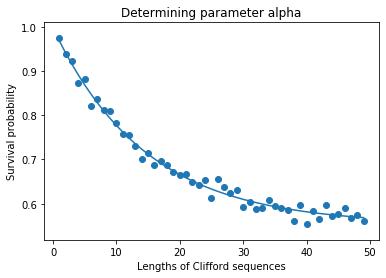

In [143]:
plt.figure(figsize=(6, 4))
plt.scatter(vector_length, S, label='Data')
plt.plot(vector_length, fit(vector_length, params[0],params[1],params[2]),
         label='Fitted function')
plt.title("Determining parameter alpha")
plt.xlabel("Lengths of Clifford sequences")
plt.ylabel("Survival probability")
print(params[1],"*(",params[0],")**length + ",params[2])
plt.show()